In [2]:
# Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN



Loading the Dataset

In [3]:
# Loading the dataset
df = pd.read_csv("C:\\Users\\apoor\\OneDrive\\Schulich\\Term 2\\Data Science 2\\Assignment_2\\Customer_Data.csv")

In [4]:
# Looking at some data rows to get a sense of the data
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Data Cleaning

In [5]:
# Looking at datatypes, null values and columns we have in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# Confirming the null values we saw above
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Looking at the distribtuion of values for all columns to get a sesne of variable distribution 
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Minimum_payments have null values - looking at the distribution of other varaibles for these rows to get a sense of why might this be the case
df_nan = df[df['MINIMUM_PAYMENTS'].isna()]
df_nan


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [9]:
df_nan.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,0.0,313.0,313.000000
mean,555.441321,0.389403,393.087284,250.433387,142.653898,559.136698,0.336043,0.107886,0.244670,0.067169,1.460064,5.833866,3731.789137,322.286168,NaN,0.0,11.063898
std,1292.687887,0.408341,757.905701,624.453991,311.289043,1185.132567,0.372517,0.227370,0.359756,0.130087,3.182359,9.600908,2924.606153,1996.658905,NaN,0.0,1.869734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,NaN,0.0,6.000000
25%,0.187069,0.090909,1.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,0.000000,NaN,0.0,12.000000
50%,16.848358,0.181818,130.400000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,2.000000,3000.000000,0.000000,NaN,0.0,12.000000
75%,286.686616,1.000000,399.950000,176.030000,152.280000,480.104401,0.583333,0.083333,0.416667,0.083333,1.000000,8.000000,5000.000000,0.000000,NaN,0.0,12.000000
max,9164.724752,1.000000,7597.090000,6761.290000,2959.240000,7616.064965,1.000000,1.000000,1.000000,1.000000,21.000000,77.000000,19500.000000,29272.486070,NaN,0.0,12.000000


In [10]:
# The rows with null values for minimum_payments also have 0 prc_full_paymnet made which hints at the fact that these customers have most likely not made any payment for their credit cards yet and hence we can replace null with 0
# For a model that is to be pushed to production we would include this in a pipeline with a clause of if full_payment 0 and min_payment nan replace with 0, else replace with median or mean dpending on the distribution of min_payment
df['MINIMUM_PAYMENTS'].fillna(0, inplace=True)

C:\Users\apoor\AppData\Local\Temp\ipykernel_5224\2667867728.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(0, inplace=True)


In [11]:
# Confirming our nulls were replaced 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
df[df['CREDIT_LIMIT'].isna()]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [13]:
# Null in credit limit does not make sense and has been replaced by median value -in a datapipeline for a production model we would do futher checkes on distribution to decide on this replacemen but here we have only one such 
# row so a quick fix made sense.
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

C:\Users\apoor\AppData\Local\Temp\ipykernel_5224\2089982616.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)


In [14]:
# confirming our null values have been replaced 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [15]:
df.duplicated().sum()

np.int64(0)

Data Preprocessing Summary:
The dataset was first loaded, and all data types were confirmed to be correct. A check for missing values revealed that MINIMUM_PAYMENTS had several nulls. Examining these rows showed that the PRCFULLPAYMENT for these customers was 0, indicating they likely had not made any payments yet. Therefore, the nulls in MINIMUM_PAYMENTS were replaced with 0.

Additionally, there was one null value in CREDIT_LIMIT, which is unexpected as every credit cardholder should have a credit limit. Given that credit limits are typically skewed, the missing value was replaced with the median credit limit. Since this affected only a single row, the impact on clustering is minimal, making this a reasonable and straightforward solution.

Exploratory Analysis

In [16]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,833.983453,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2335.989918,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


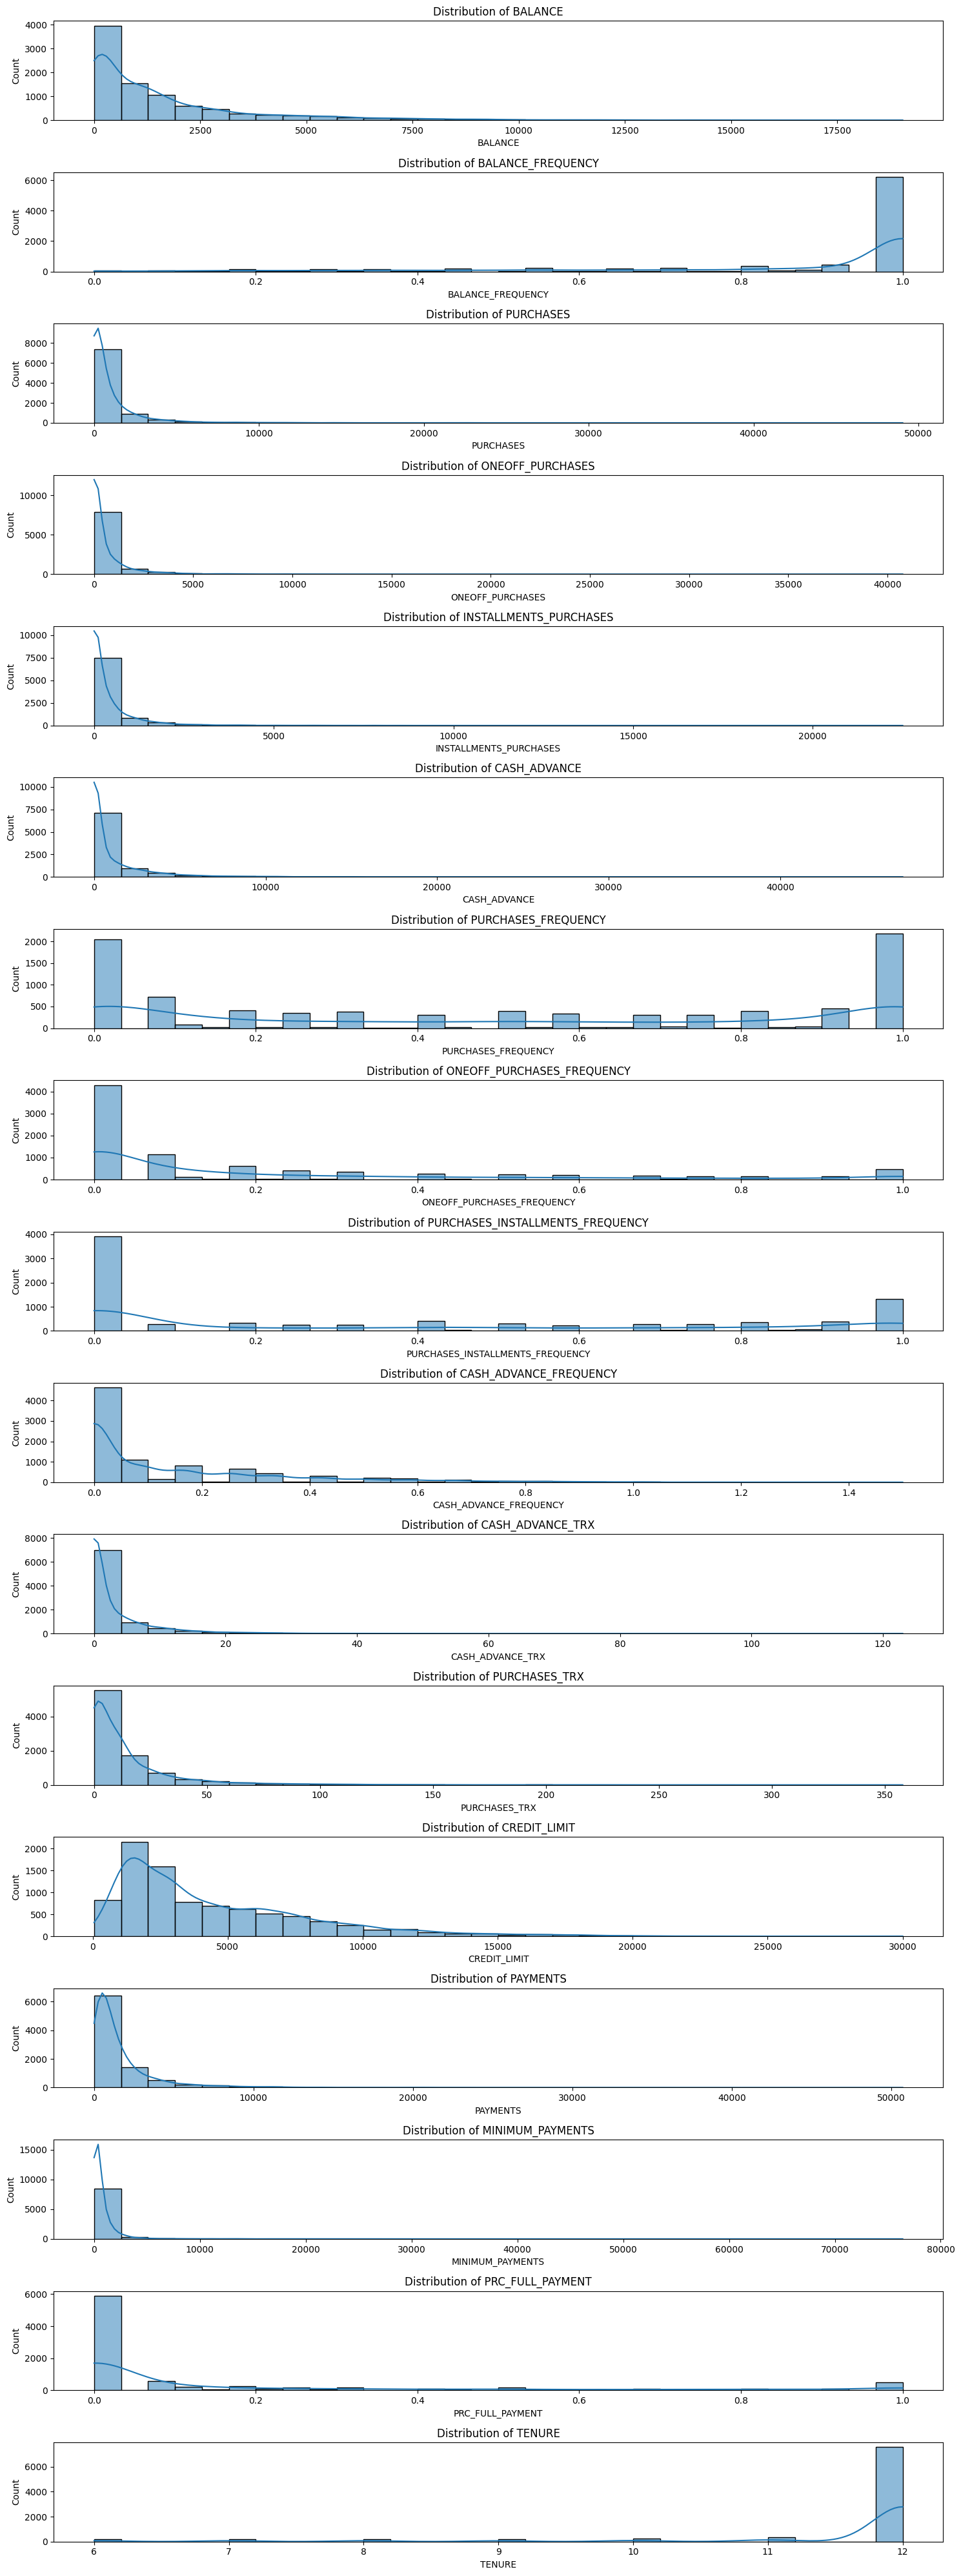

In [17]:
# Plotting the features to better visualise their distribution

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(15, 40)) 

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


1. High Skewness/Range in our varibale values - would need scaling in clustering
2. Many variables measuring frequency are 0 indicating many users might be categorised as inactive.
3. Credit limits and payment patterns are also very skewwed - some users don't fully pay their balances regularly.
4. The tenure for all users is 12.

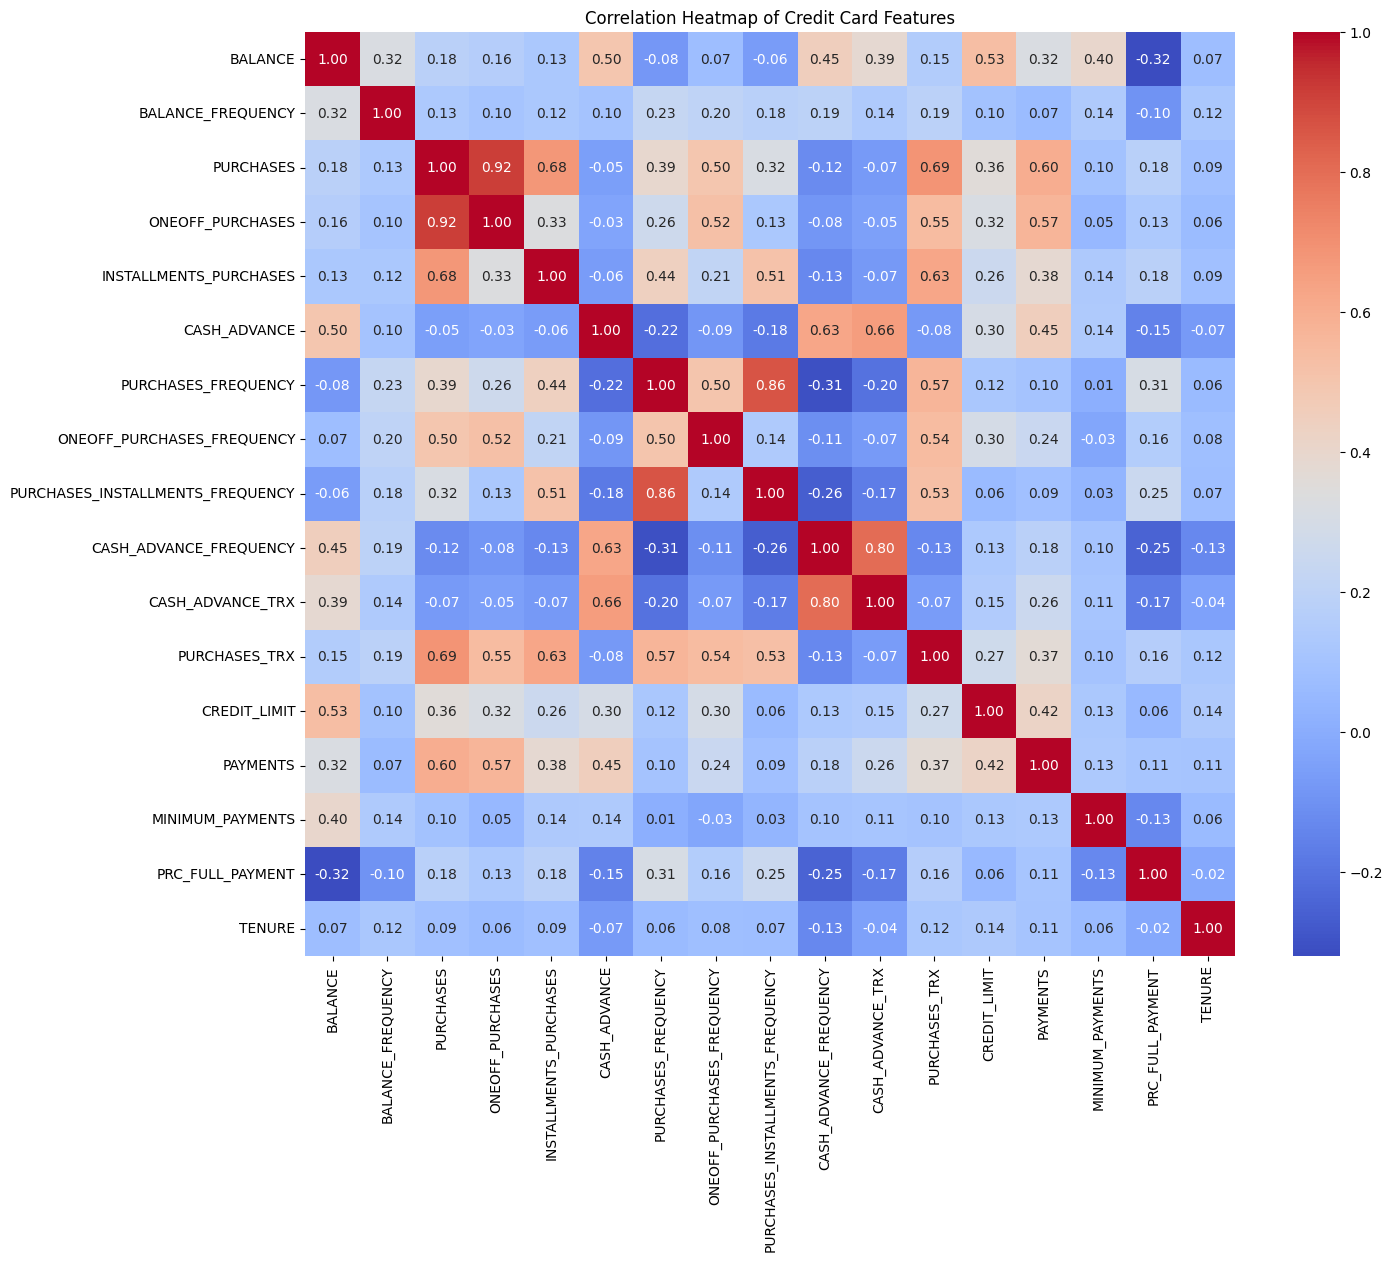

In [18]:
# Plotting a heatmap to visualise co-realtion between the features in our dataset
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr = numeric_df.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Credit Card Features")
plt.show()

1. Strong coorelation between PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES - users who spend a lot overall (PURCHASES) also tend to have high one-off and installment purchases.
2. Strong coorelation between PURCHASESFREQUENCY & PURCHASES_INSTALLMENTS_FREQUENCY - Users who frequently make purchases also tend to make installment purchases frequently.
3. Strong coorelation between CASH_ADVANCE_FREQUENCY & CASH_ADVANCE_TRX - makes sense since more frequent cash advances means more transactions.

Data Processing

In [19]:
# Drop irrelvant columns
df_cluster = df.drop(['CUST_ID', 'TENURE'], axis=1)

In [20]:
df_cluster.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [21]:
# Since varaious features were highly skewwed we do a log transformation before scaling to ensure our clustering algorithms can perform better
skewed_features = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'
]

df_cluster[skewed_features] = df_cluster[skewed_features].apply(lambda x: np.log1p(x))



In [22]:
# Scaling the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

In [23]:
pca = PCA()
pca.fit(df_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
print(cumulative_variance)

[0.31448238 0.55021659 0.64987693 0.72917219 0.79265542 0.84141965
 0.87836532 0.91230182 0.93381396 0.95166472 0.96634472 0.97590874
 0.98475597 0.99205042 0.99831228 1.        ]


In [24]:
#PCA with 5 components (74% variance captured)
pca_5 = PCA(n_components=5)
df_pca_5 = pca_5.fit_transform(df_scaled)
df_pca_5 = pd.DataFrame(df_pca_5, columns=[f'PC{i+1}' for i in range(5)])

#PCA with 10 components (92% variance captured)
pca_10 = PCA(n_components=10)
df_pca_10 = pca_10.fit_transform(df_scaled)
df_pca_10 = pd.DataFrame(df_pca_10, columns=[f'PC{i+1}' for i in range(10)])

# Optional: check shapes
print("PCA 5D shape:", df_pca_5.shape)
print("PCA 10D shape:", df_pca_10.shape)

PCA 5D shape: (8950, 5)
PCA 10D shape: (8950, 10)


1. Dropping Irrelevant Columns
Dropped CUSTID (identifier, not informative for clustering).
Dropped TENURE (constant for all users, doesn’t help differentiate clusters).

2. Log Transformation 
Several features in the dataset, such as BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS, and MINIMUM_PAYMENTS, exhibited highly skewed distributions with a few extreme values far larger than the majority of observations. To reduce the impact of these outliers and compress the long right tails, we applied a log transformation (log1p) to these features. This transformation preserves the relative order of values while bringing the distributions closer to normal, which improves the performance of distance-based clustering algorithms and ensures that extreme values do not dominate the clustering process. 

3. Feature Scaling
All numeric features have very different scales (e.g., CASH_ADVANCE in thousands, frequencies 0–1).
Used StandardScaler to standardize features (mean = 0, std = 1) so that all features contribute equally to clustering.

4. Dimensionality Reduction - highly corelated features in dataset - PCA takes care of that as well.
Applied PCA on the scaled data.
Created different PCA datasets to capture varying levels of information:
5 PCs: Captures ~74% variance — moderate reduction. Balances dimensionality reduction and information retention; captures general behavioral patterns.
10 PCs: Captures ~92% variance — most detailed representation. Preserves almost all information; clusters will reflect finer differences in customer behavior.
Kept original 16 features as well for comparison. PCA reduces noise from less important variables and speeds up clustering without major loss of meaningful information.


Clustering Algorithms

1. K Means Clustering

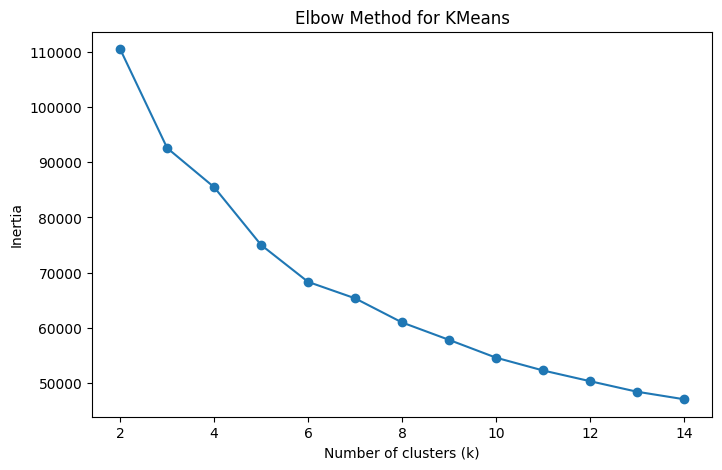

In [25]:
# Determine optimal number of clusters using Elbow Method
inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.show()


In [26]:
# Looking at the silhouette score for the optimal k value from above
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(df_scaled)

silhouette = silhouette_score(df_scaled, labels_kmeans)
print(f'Silhouette Score for KMeans (k={k}): {silhouette:.3f}')


Silhouette Score for KMeans (k=8): 0.227


In [27]:
# Creating cluster summaries to interpret the clusters formed
numeric_cols = df.drop(['CUST_ID', 'TENURE'], axis=1).columns

df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)

df_scaled['cluster'] = kmeans.labels_

cluster_summary = df_scaled.groupby('cluster').mean()

In [28]:
cluster_summary['count'] = df_scaled['cluster'].value_counts().sort_index()

In [29]:
cluster_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,count
cluster,,,,,,,,,,,,,,,,,
0,0.294808,0.308752,0.397159,0.763018,-0.514491,-0.238896,-0.285000,0.309566,-0.674351,-0.319378,-0.288763,-0.282745,-0.154539,-0.004943,0.204220,-0.428189,1603
1,-0.445983,0.298295,0.428697,-0.705208,0.884633,-0.636171,0.877766,-0.583318,1.094099,-0.531108,-0.399520,-0.000513,-0.492678,-0.188977,-0.079745,0.381904,1786
2,-0.451604,0.266839,0.939450,1.186869,0.565993,-0.789080,1.012980,1.700186,0.423392,-0.612700,-0.440833,0.850126,0.678576,0.643550,-0.354636,2.065292,603
3,-1.690292,-2.059247,-0.023934,-0.270892,-0.097840,-0.731639,-0.450202,-0.444536,-0.349483,-0.604558,-0.438818,-0.406511,-0.254007,-0.386644,-1.010617,0.406177,948
4,0.960865,0.421516,0.148001,0.276394,-0.046567,1.368974,-0.065210,0.035392,-0.145231,2.223981,2.291254,-0.111690,0.739678,0.714763,0.829798,-0.386158,678
5,0.535068,0.199832,-1.541799,-0.913348,-1.033184,0.988199,-1.186293,-0.658443,-0.899607,0.613235,0.295612,-0.584501,-0.144018,0.063208,0.362401,-0.417079,1980
6,-1.076698,-1.749565,-0.377093,-0.249766,-0.447045,-0.074516,-0.533408,-0.263465,-0.475292,-0.249184,-0.200653,-0.369473,-0.114874,-4.122105,-3.550197,-0.525551,249
7,0.685276,0.469414,0.997477,1.143004,1.074183,-0.161091,1.116065,1.166912,1.088818,-0.232926,-0.209037,1.497679,0.699476,0.671403,0.535642,-0.369560,1103


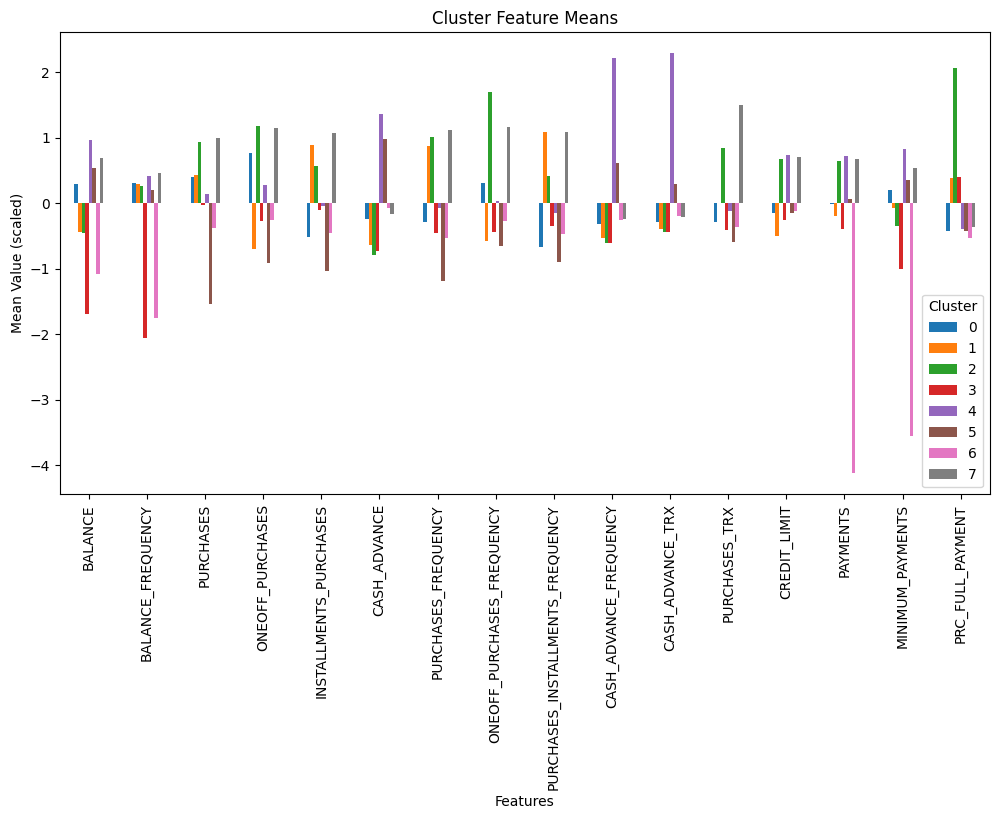

In [30]:
cluster_summary = cluster_summary.drop(columns='count')
cluster_summary.T.plot(kind='bar', figsize=(12,6))
plt.title("Cluster Feature Means")
plt.xlabel("Features")
plt.ylabel("Mean Value (scaled)")
plt.legend(title="Cluster")
plt.show()

In [31]:
from sklearn.metrics import adjusted_rand_score

kmeans_1 = KMeans(n_clusters=5, random_state=42).fit(df_scaled)
kmeans_2 = KMeans(n_clusters=5, random_state=99).fit(df_scaled)
stability = adjusted_rand_score(kmeans_1.labels_, kmeans_2.labels_)
print(f"Cluster Stability (ARI): {stability:.3f}")


Cluster Stability (ARI): 0.531


In [32]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(df_scaled, kmeans.labels_)
print(f"Davies-Bouldin Score: {db_score:.3f}")

Davies-Bouldin Score: 1.208


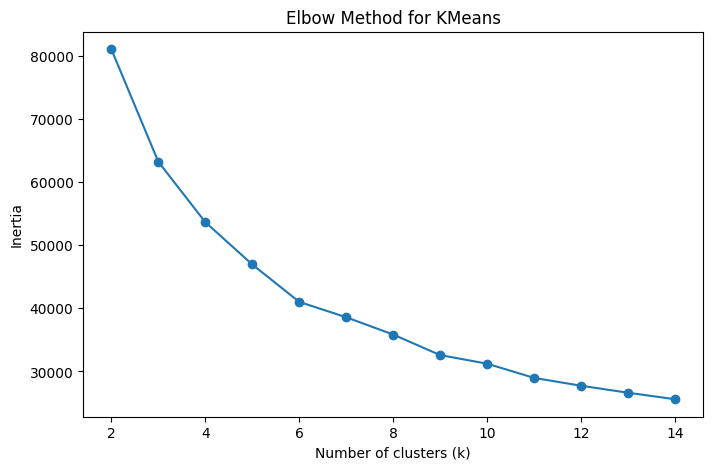

In [33]:
# Same process for PCA_5 dataset
inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_5)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.show()


In [34]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(df_pca_5)

silhouette = silhouette_score(df_pca_5, labels_kmeans)
print(f'Silhouette Score for KMeans (k={k}): {silhouette:.3f}')

Silhouette Score for KMeans (k=6): 0.294


In [35]:
n_components = df_pca_5.shape[1]

pca_cols = [f'PC{i+1}' for i in range(n_components)]

df_pca_5 = pd.DataFrame(df_pca_5, columns=pca_cols)

df_pca_5['cluster'] = kmeans.labels_

cluster_summary = df_pca_5.groupby('cluster').mean()

cluster_summary['count'] = df_pca_5['cluster'].value_counts().sort_index()

cluster_summary

,PC1,PC2,PC3,PC4,PC5,count
cluster,,,,,,
0,-0.355779,2.967366,-0.455592,1.424934,-0.644356,800
1,-0.613134,-3.411512,0.771573,1.123632,-0.377908,961
2,0.088976,0.004914,1.294016,-0.791892,-0.077233,1605
3,-2.883275,0.573141,-0.173944,-0.257855,0.330787,2199
4,1.345673,-1.037893,-1.451100,-0.205728,0.118885,2001
5,3.163778,1.237840,0.601337,0.021614,0.026967,1384


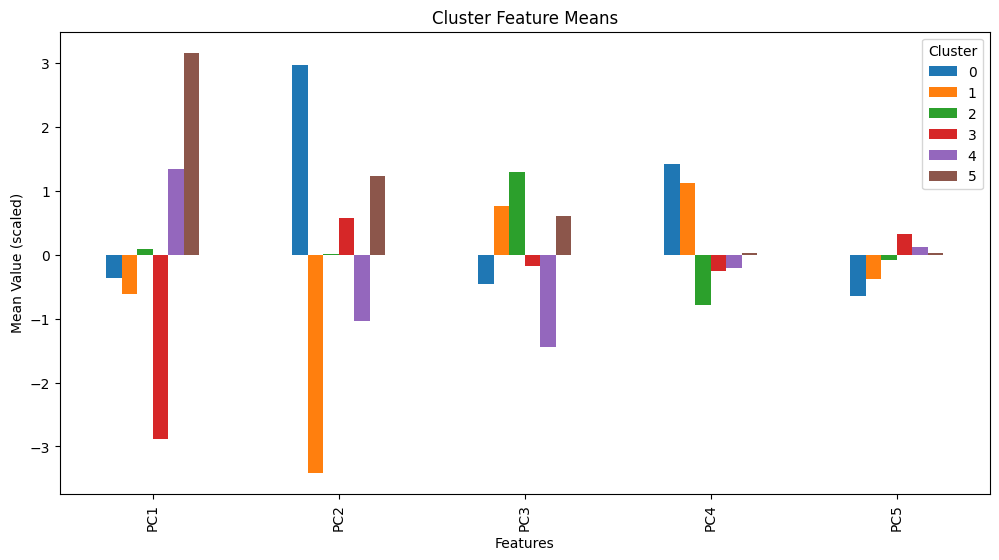

In [36]:
cluster_summary = cluster_summary.drop(columns='count')
cluster_summary.T.plot(kind='bar', figsize=(12,6))
plt.title("Cluster Feature Means")
plt.xlabel("Features")
plt.ylabel("Mean Value (scaled)")
plt.legend(title="Cluster")
plt.show()

In [37]:
kmeans_1 = KMeans(n_clusters=5, random_state=42).fit(df_pca_5)
kmeans_2 = KMeans(n_clusters=5, random_state=99).fit(df_pca_5)
stability = adjusted_rand_score(kmeans_1.labels_, kmeans_2.labels_)
print(f"Cluster Stability (ARI): {stability:.3f}")

Cluster Stability (ARI): 0.739


In [38]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(df_pca_5, kmeans.labels_)
print(f"Davies-Bouldin Score: {db_score:.3f}")

Davies-Bouldin Score: 1.029


                                       PC1       PC2       PC3       PC4  \
BALANCE                          -0.085433  0.441609 -0.017072 -0.283677   
BALANCE_FREQUENCY                 0.049242  0.333060 -0.178732 -0.395844   
PURCHASES                         0.391167  0.062400  0.099649  0.051302   
ONEOFF_PURCHASES                  0.241349  0.179360  0.521059  0.010743   
INSTALLMENTS_PURCHASES            0.354764  0.023436 -0.375342  0.109638   
CASH_ADVANCE                     -0.285303  0.275242 -0.070528  0.222961   
PURCHASES_FREQUENCY               0.398585  0.060909 -0.188861  0.071634   
ONEOFF_PURCHASES_FREQUENCY        0.258107  0.182245  0.462391  0.054603   
PURCHASES_INSTALLMENTS_FREQUENCY  0.342307  0.024443 -0.448429  0.087107   
CASH_ADVANCE_FREQUENCY           -0.240692  0.299567 -0.099832  0.410734   
CASH_ADVANCE_TRX                 -0.182297  0.276940 -0.107349  0.497451   
PURCHASES_TRX                     0.299704  0.176498  0.027191  0.099475   
CREDIT_LIMIT

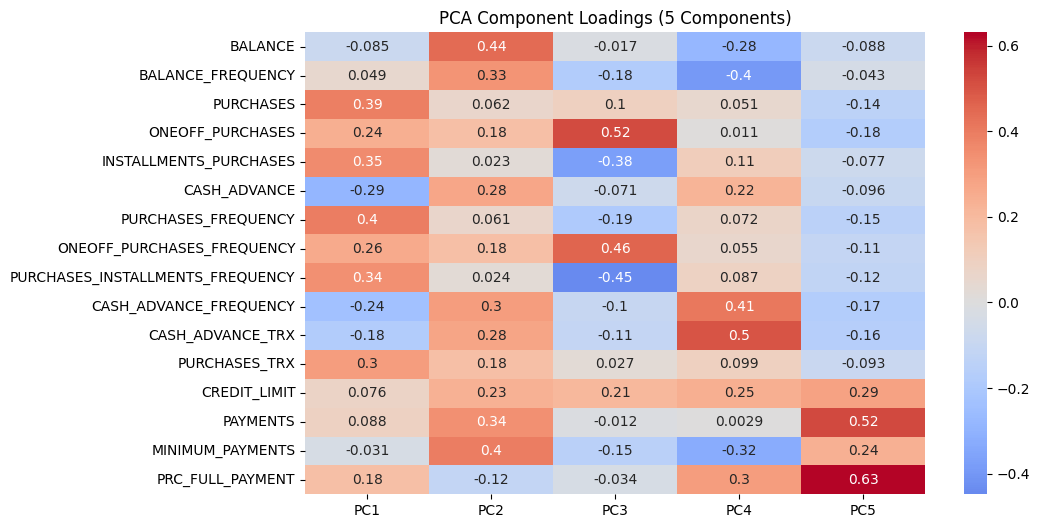

In [40]:
# Drop ID-like columns if they exist
df_features = df_scaled.drop(columns=['cluster'], errors='ignore')

# Now rebuild the loadings DataFrame
loadings_5 = pd.DataFrame(
    pca_5.components_.T,
    columns=[f'PC{i+1}' for i in range(pca_5.n_components_)],
    index=df_features.columns
)

print(loadings_5)

# Optional: visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(loadings_5, annot=True, cmap='coolwarm', center=0)
plt.title("PCA Component Loadings (5 Components)")
plt.show()


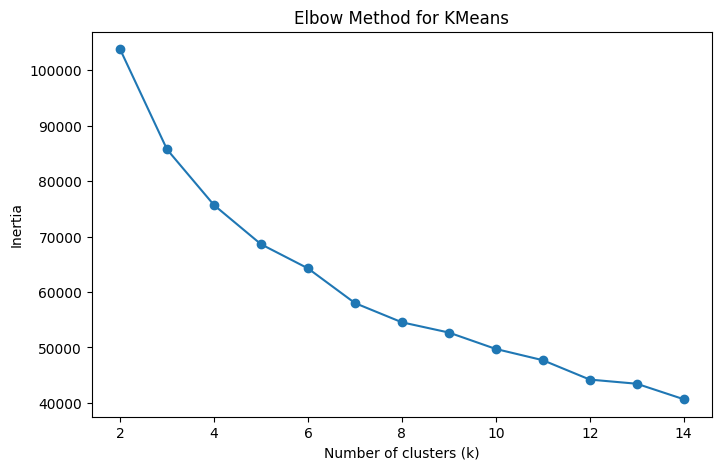

In [57]:
# Same process for PCA_10 dataset
inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_10)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.show()


In [58]:
k = 9
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(df_pca_10)

silhouette = silhouette_score(df_pca_10, labels_kmeans)
print(f'Silhouette Score for KMeans (k={k}): {silhouette:.3f}')

Silhouette Score for KMeans (k=9): 0.209


In [59]:
n_components = df_pca_10.shape[1]

pca_cols = [f'PC{i+1}' for i in range(n_components)]

df_pca_10 = pd.DataFrame(df_pca_10, columns=pca_cols)

df_pca_10['cluster'] = kmeans.labels_

cluster_summary = df_pca_10.groupby('cluster').mean()

cluster_summary['count'] = df_pca_10['cluster'].value_counts().sort_index()

cluster_summary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,count
cluster,,,,,,,,,,,
0,-1.036650,1.323208,0.656122,-0.035433,-0.286770,-0.185101,-0.218773,-0.374873,0.475564,-0.425924,843
1,0.925954,-0.667164,-1.448935,-0.746711,-0.483314,0.077622,-0.172146,-0.203389,-0.093286,0.136667,1246
2,-2.997423,0.349858,-0.235405,-0.387363,0.397297,0.005379,0.252812,0.523372,0.085166,0.163189,1833
3,1.891622,1.611173,-0.277664,-0.081471,-0.524274,0.471602,-0.177351,-0.163688,0.389460,-0.029753,1029
4,1.700888,-1.794875,-1.143769,0.640535,1.160657,-0.433028,0.370595,-0.283835,-0.038268,-0.246685,928
5,3.875404,1.412404,0.983946,0.370763,0.347162,-0.168757,0.366834,0.999033,-0.172940,0.112447,692
6,-0.774720,-3.614472,0.822507,1.186502,-0.675194,0.700049,-0.329624,0.220188,-0.024932,-0.018263,776
7,0.369568,-0.399339,1.595153,-0.780025,0.048023,-0.258217,-0.117594,-0.440174,-0.300226,0.033067,1208
8,-2.120266,3.524374,-0.544831,2.341021,-0.496708,-0.375939,-0.207370,-0.730463,-0.770437,0.115427,395


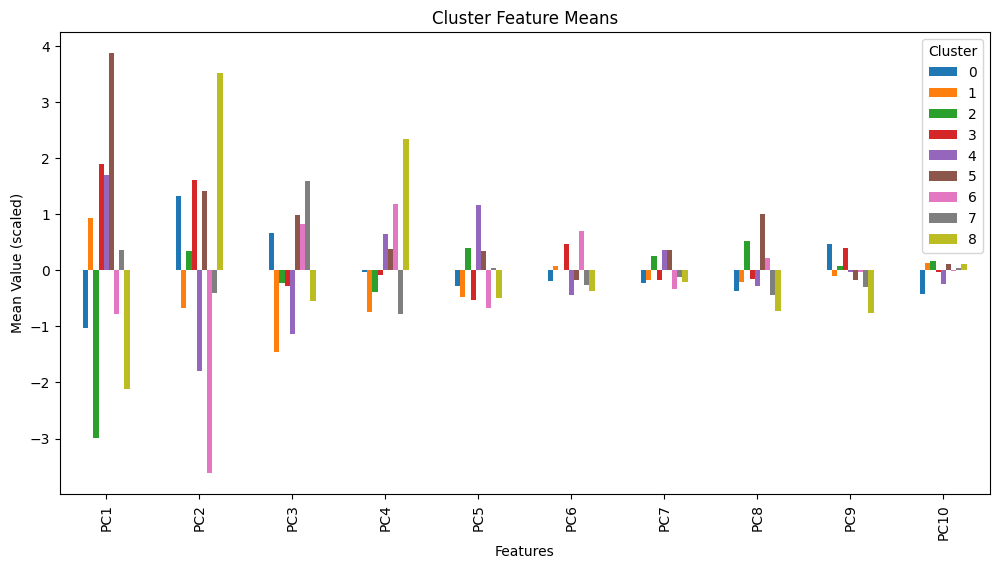

In [60]:
cluster_summary = cluster_summary.drop(columns='count')
cluster_summary.T.plot(kind='bar', figsize=(12,6))
plt.title("Cluster Feature Means")
plt.xlabel("Features")
plt.ylabel("Mean Value (scaled)")
plt.legend(title="Cluster")
plt.show()

In [67]:
kmeans_1 = KMeans(n_clusters=5, random_state=42).fit(df_pca_10)
kmeans_2 = KMeans(n_clusters=5, random_state=99).fit(df_pca_10)
stability = adjusted_rand_score(kmeans_1.labels_, kmeans_2.labels_)
print(f"Cluster Stability (ARI): {stability:.3f}")

Cluster Stability (ARI): 0.712


In [68]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(df_pca_5, kmeans.labels_)
print(f"Davies-Bouldin Score: {db_score:.3f}")

Davies-Bouldin Score: 1.435


2. DBSCAN

In [155]:
df_scaled_db = df_scaled
df_pca_5_db = df_pca_5
df_pca_10_db = df_pca_10

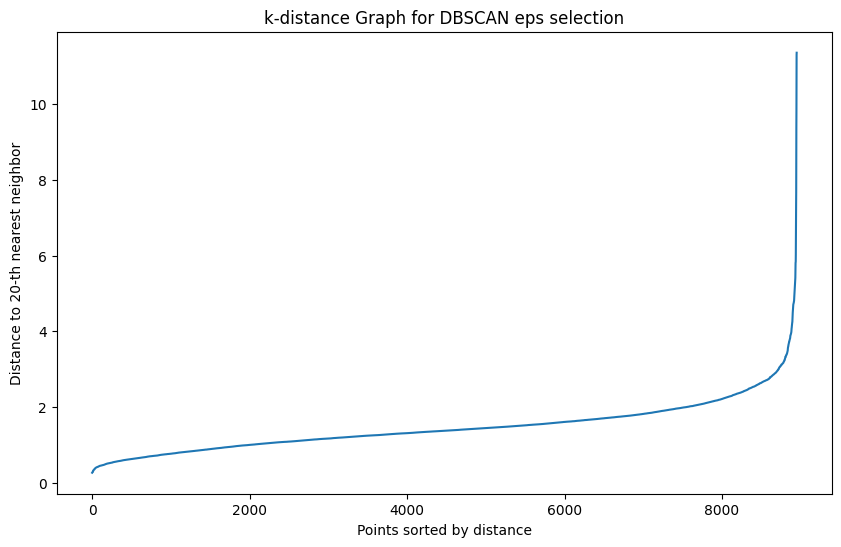

In [73]:
# Trying to figure out what eps value to use
min_samples = 20

# Compute nearest neighbors
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_scaled_db)
distances, indices = neighbors_fit.kneighbors(df_scaled_db)

k_distances = np.sort(distances[:, min_samples-1])

plt.figure(figsize=(10,6))
plt.plot(k_distances)
plt.ylabel(f"Distance to {min_samples}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title("k-distance Graph for DBSCAN eps selection")
plt.show()

In [86]:

# Trying different eps value
dbscan = DBSCAN(eps=2, min_samples=20)
dbscan_labels = dbscan.fit_predict(df_scaled_db)

numeric_cols = df.drop(['CUST_ID', 'TENURE'], axis=1).columns

df_scaled_db = pd.DataFrame(df_scaled_db, columns=numeric_cols)

df_scaled_db['dbscan_cluster'] = dbscan_labels

dbscan_summary = df_scaled_db.groupby('dbscan_cluster').mean()
dbscan_summary['count'] = df_scaled_db['dbscan_cluster'].value_counts().sort_index()
dbscan_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,count
dbscan_cluster,,,,,,,,,,,,,,,,,
-1,-0.018148,-0.364514,0.283863,0.358432,0.097038,0.487295,0.143000,0.406540,0.029866,0.740217,1.172311,0.955399,0.302762,-0.301957,-0.748167,0.142863,494
0,0.347671,0.271731,-0.595491,-0.540116,-0.357500,0.482202,-0.450224,-0.480964,-0.289794,0.246731,0.066674,-0.370128,-0.271846,-0.002613,0.303725,-0.411560,3866
1,-0.595829,-0.604173,0.331430,0.572866,-0.531194,-0.847028,-0.254322,0.290564,-0.649699,-0.643733,-0.462641,-0.297123,-0.103872,-0.199369,-0.363416,-0.135758,1615
2,-0.127237,0.205883,0.763633,0.455139,0.973322,-0.451507,0.951920,0.547955,0.959106,-0.384930,-0.300601,0.651347,0.367876,0.349704,0.034571,0.770960,2507
3,1.044038,0.473308,-0.399796,-0.083003,-0.440744,1.408087,-0.503257,-0.266898,-0.459251,2.691810,2.597495,-0.351710,0.838403,0.742508,0.894329,-0.450545,278
4,-1.887768,-3.100448,-0.646764,-0.585417,-0.500067,-0.215684,-0.741836,-0.542882,-0.538170,-0.416315,-0.327410,-0.475766,-0.196851,-4.147978,-3.577830,-0.525551,138
5,-1.608017,-2.203210,-1.679855,-0.987090,-1.087454,0.639987,-1.221758,-0.678661,-0.916995,-0.110625,-0.250630,-0.590249,-1.135187,-0.566422,-1.139296,0.091333,52


In [103]:
# Only include non-noise points
mask = dbscan_labels != -1
sil_score = silhouette_score(df_scaled_db[mask], dbscan_labels[mask])
print("Silhouette Score:", sil_score)


Silhouette Score: 0.25754444064475673


In [104]:
db_score = davies_bouldin_score(df_scaled_db[mask], dbscan_labels[mask])
print("Davies-Bouldin Index:", db_score)

Davies-Bouldin Index: 1.2082458768252198


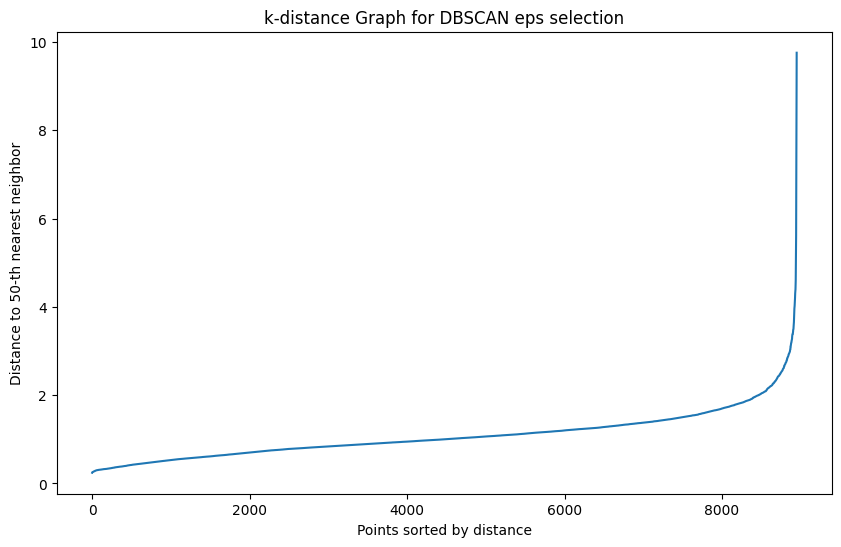

In [94]:
# Doing the same for PCA_5 dataset
min_samples = 50

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_pca_5_db)
distances, indices = neighbors_fit.kneighbors(df_pca_5_db)

# Take the distance to the k-th neighbor
k_distances = np.sort(distances[:, min_samples-1])

# Plot the k-distance graph
plt.figure(figsize=(10,6))
plt.plot(k_distances)
plt.ylabel(f"Distance to {min_samples}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title("k-distance Graph for DBSCAN eps selection")
plt.show()

In [147]:
n_components = df_pca_5_db.shape[1]
pca_cols = [f'PC{i+1}' for i in range(n_components)]
df_pca_5_db = pd.DataFrame(df_pca_5_db, columns=pca_cols)

dbscan = DBSCAN(eps=1, min_samples=60)
dbscan_labels = dbscan.fit_predict(df_pca_5_db)

df_pca_5_db['dbscan_cluster'] = dbscan_labels

dbscan_summary = df_pca_5_db.groupby('dbscan_cluster').mean()
dbscan_summary['count'] = df_pca_5_db['dbscan_cluster'].value_counts().sort_index()
dbscan_summary


,PC1,PC2,PC3,PC4,PC5,count
dbscan_cluster,,,,,,
-1,0.287914,0.479816,0.298082,0.978897,-0.326647,2406
0,-0.105856,-0.176412,-0.109594,-0.359906,0.120097,6544


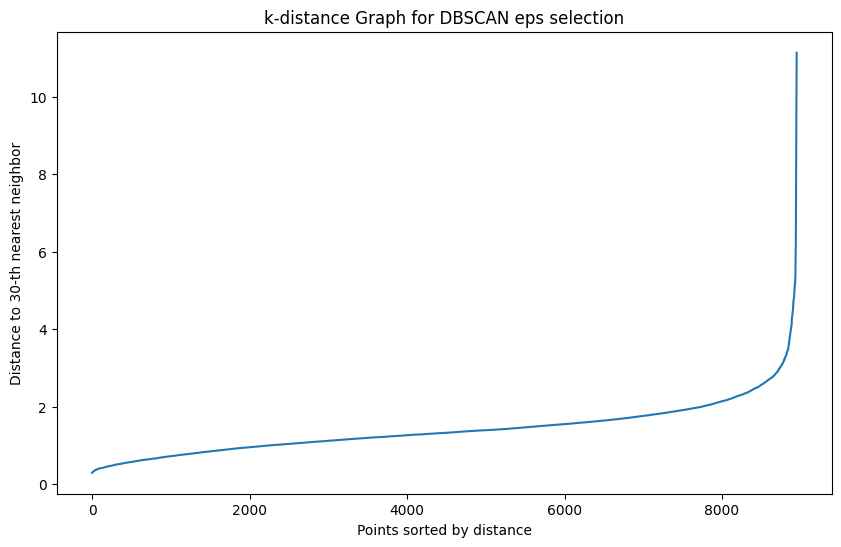

In [101]:
# Doing the same for PCA_10 dataset
min_samples = 30

# Compute nearest neighbors
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_pca_10_db)
distances, indices = neighbors_fit.kneighbors(df_pca_10_db)

# Take the distance to the k-th neighbor
k_distances = np.sort(distances[:, min_samples-1])

# Plot the k-distance graph
plt.figure(figsize=(10,6))
plt.plot(k_distances)
plt.ylabel(f"Distance to {min_samples}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title("k-distance Graph for DBSCAN eps selection")
plt.show()

In [156]:
dbscan = DBSCAN(eps=1, min_samples=20)
dbscan_labels = dbscan.fit_predict(df_pca_10_db)

# Recreate the scaled dataframe correctly
n_components = df_pca_10_db.shape[1]
pca_cols = [f'PC{i+1}' for i in range(n_components)]
df_pca_10_db = pd.DataFrame(df_pca_10_db, columns=pca_cols)

# Add DBSCAN labels to the dataframe
df_pca_10_db['dbscan_cluster'] = dbscan_labels

# Summary of DBSCAN clusters
dbscan_summary = df_pca_10_db.groupby('dbscan_cluster').mean()
dbscan_summary['count'] = df_pca_10_db['dbscan_cluster'].value_counts().sort_index()
dbscan_summary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,count
dbscan_cluster,,,,,,,,,,,
-1,0.608667,0.217078,0.315744,0.554122,-0.158161,-0.004419,-0.137048,0.021394,0.120013,-0.067446,4020
0,-3.077149,0.531211,-0.276042,-0.409036,0.378220,0.006446,0.312027,0.491692,0.024636,0.187819,1692
1,0.881048,-0.514960,-0.338862,-0.583056,-0.007020,-0.018945,0.036474,-0.317702,-0.209492,-0.024887,2819
2,0.309539,0.854708,-2.149942,-0.291097,-0.612593,0.202751,-0.169948,-0.074569,0.771531,-0.035006,127
3,1.380073,1.030463,2.592452,-1.079911,-0.116834,-0.224521,0.418746,-0.351252,-0.136464,1.380331,28
4,3.997880,0.480572,1.179448,0.906558,1.431191,-1.005549,1.187414,0.117195,0.205533,0.260493,75
5,-0.704638,-2.547289,1.893577,0.332707,0.065075,0.673084,-1.378739,-0.178520,-0.405758,-0.042507,138
6,3.128540,-0.570534,-0.839927,0.785822,1.565183,-0.420840,0.969237,-0.594222,0.113032,-0.589688,20
7,-3.105306,-4.667942,1.143241,2.085246,-2.344717,1.293510,1.394572,1.134643,0.739236,-0.676949,20


In [157]:
# Only include non-noise points
mask = dbscan_labels != -1
sil_score = silhouette_score(df_pca_10_db[mask], dbscan_labels[mask])
print("Silhouette Score:", sil_score)


Silhouette Score: 0.22818146958098257


In [158]:
db_score = davies_bouldin_score(df_pca_10_db[mask], dbscan_labels[mask])
print("Davies-Bouldin Index:", db_score)

Davies-Bouldin Index: 0.8459649630565004


3. Hierarchical Clustering

In [201]:
df_scaled_hc = df_scaled
df_pca_5_hc = df_pca_5
df_pca_10_hc = df_pca_10

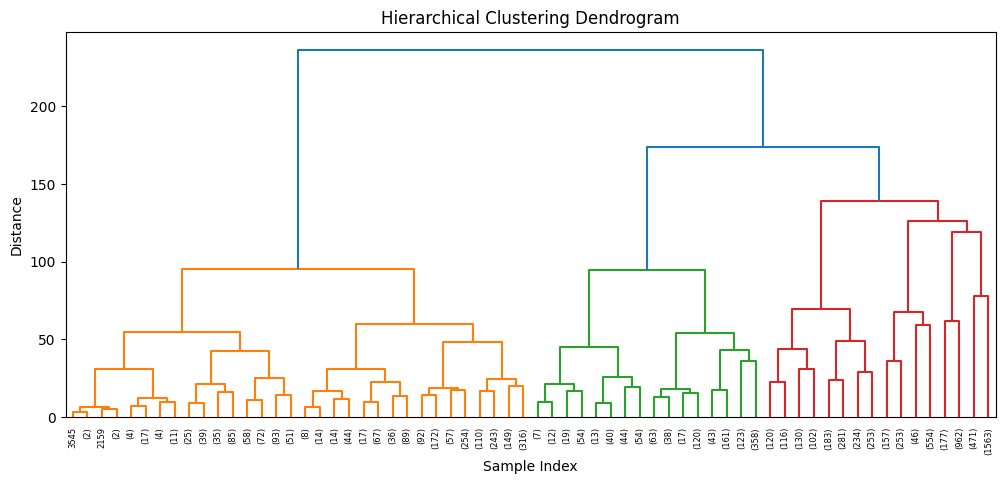

In [167]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Compute linkage matrix
linkage_matrix = linkage(df_scaled_hc, method='ward')

# Plot dendrogram (sample a subset if too large)
plt.figure(figsize=(12,5))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [189]:
from scipy.cluster.hierarchy import fcluster
numeric_cols = df.drop(['CUST_ID', 'TENURE'], axis=1).columns

df_scaled_hc = pd.DataFrame(df_scaled_hc, columns=numeric_cols)
clusters = fcluster(linkage_matrix, t=120, criterion='distance')
df_scaled_hc['hierarchy_cluster'] = clusters
hc_summary = df_scaled_hc.groupby('hierarchy_cluster').mean()
hc_summary['count'] = df_scaled_hc['hierarchy_cluster'].value_counts().sort_index()
hc_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,count
hierarchy_cluster,,,,,,,,,,,,,,,,,
1,0.683293,0.340021,-1.313271,-0.717266,-1.012187,1.059013,-1.099854,-0.557544,-0.887226,0.925979,0.669797,-0.554837,0.047863,0.183686,0.500521,-0.442353,2213
2,0.255795,0.301222,0.688290,0.955953,0.288065,-0.212066,0.483222,0.766633,0.217332,-0.169017,-0.109172,0.481849,0.255116,0.344796,0.192529,0.047577,3809
3,-1.413807,-2.006904,-0.504883,-0.240229,-0.691736,-0.186094,-0.688864,-0.389241,-0.581965,-0.338663,-0.270435,-0.451037,-0.328466,-1.563109,-1.946127,-0.267442,786
4,-0.642016,-0.150512,0.318118,-0.870726,0.787319,-0.648724,0.529800,-0.644405,0.743715,-0.531848,-0.398629,-0.118111,-0.382577,-0.229328,-0.145351,0.470549,2142


In [190]:
# Extract features (excluding cluster labels)
X = df_scaled_hc.drop('hierarchy_cluster', axis=1)
labels = df_scaled_hc['hierarchy_cluster']

# Compute silhouette score
silhouette_avg = silhouette_score(X, labels)

# Compute Davies-Bouldin index
db_index = davies_bouldin_score(X, labels)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")


Silhouette Score: 0.190
Davies-Bouldin Index: 1.716


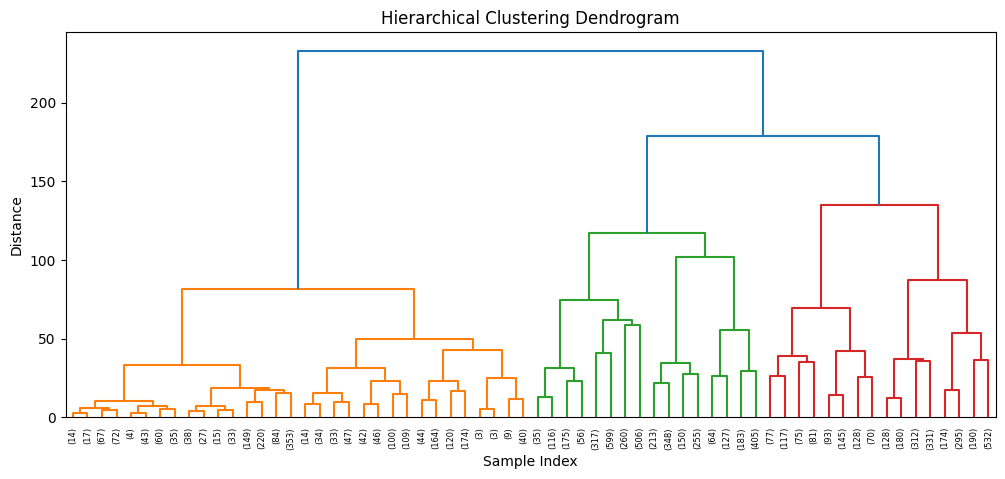

In [172]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Compute linkage matrix
linkage_matrix = linkage(df_pca_5_hc, method='ward')

# Plot dendrogram (sample a subset if too large)
plt.figure(figsize=(12,5))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster
n_components = df_pca_5_hc.shape[1]
pca_cols = [f'PC{i+1}' for i in range(n_components)]
df_pca_5_hc = pd.DataFrame(df_pca_5_hc, columns=pca_cols)

clusters = fcluster(linkage_matrix, t=120, criterion='distance')
df_pca_5_hc['hierarchy_cluster'] = clusters
hc_summary = df_pca_5_hc.groupby('hierarchy_cluster').mean()
hc_summary['count'] = df_pca_5_hc['hierarchy_cluster'].value_counts().sort_index()
hc_summary

,PC1,PC2,PC3,PC4,PC5,count
hierarchy_cluster,,,,,,
1,-2.863804,0.973673,-0.155939,-0.090098,0.271973,2213
2,1.378032,0.804207,0.641313,-0.126549,-0.150392,3809
3,-1.155187,-3.177523,0.994456,1.073288,-0.790984,786
4,0.932143,-1.270042,-1.344217,-0.075719,0.276694,2142


In [193]:
# Extract features (excluding cluster labels)
X = df_pca_5_hc.drop('hierarchy_cluster', axis=1)
labels = df_pca_5_hc['hierarchy_cluster']

# Compute silhouette score
silhouette_avg = silhouette_score(X, labels)

# Compute Davies-Bouldin index
db_index = davies_bouldin_score(X, labels)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")


Silhouette Score: 0.240
Davies-Bouldin Index: 1.412


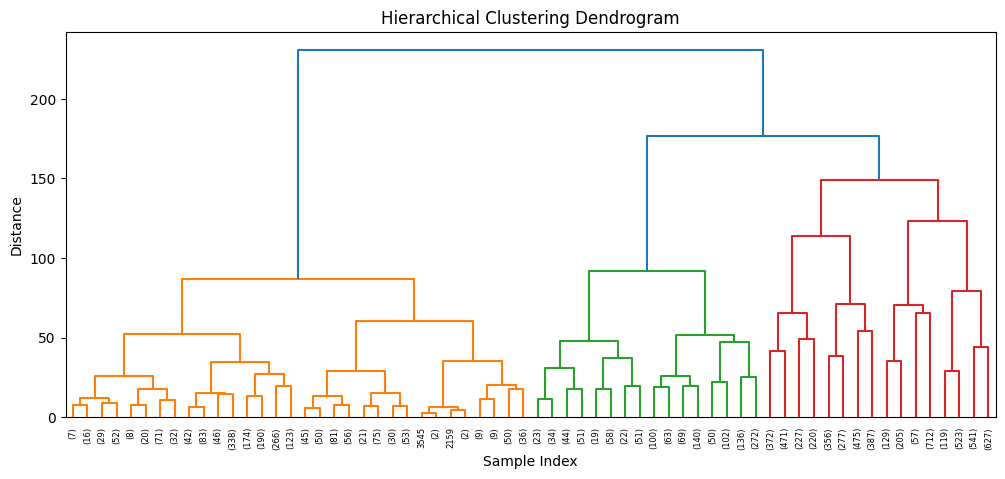

In [164]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Compute linkage matrix
linkage_matrix = linkage(df_pca_10_hc, method='ward')

# Plot dendrogram (sample a subset if too large)
plt.figure(figsize=(12,5))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [202]:
from scipy.cluster.hierarchy import fcluster
n_components = df_pca_10_hc.shape[1]
pca_cols = [f'PC{i+1}' for i in range(n_components)]
df_pca_10_hc = pd.DataFrame(df_pca_10_hc, columns=pca_cols)

clusters = fcluster(linkage_matrix, t=150, criterion='distance')
df_pca_10_hc['hierarchy_cluster'] = clusters
hc_summary = df_pca_10_hc.groupby('hierarchy_cluster').mean()
hc_summary['count'] = df_pca_10_hc['hierarchy_cluster'].value_counts().sort_index()
hc_summary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,count
hierarchy_cluster,,,,,,,,,,,
1,-2.863804,0.973673,-0.155939,-0.090098,0.271973,-0.039337,0.202344,0.241654,-0.018683,0.094367,2213
2,1.378032,0.804207,0.641313,-0.126549,-0.150392,-0.115217,-0.065305,-0.099604,0.043134,-0.051382,3809
3,0.371815,-1.782091,-0.716417,0.232723,-0.009916,0.179616,-0.067979,-0.053070,-0.041992,-0.004481,2928


In [203]:
# Extract features (excluding cluster labels)
X = df_pca_10_hc.drop('hierarchy_cluster', axis=1)
labels = df_pca_10_hc['hierarchy_cluster']

# Compute silhouette score
silhouette_avg = silhouette_score(X, labels)

# Compute Davies-Bouldin index
db_index = davies_bouldin_score(X, labels)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")


Silhouette Score: 0.202
Davies-Bouldin Index: 1.785
